## About the data

The objective of the dataset is to diagnostically predict whether a patient is having chronic kidney disease or not, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Class. Predictor variables includes Blood Pressure(Bp), Albumin(Al), etc.

<u>Data Attributes</u>
- Bp: Blood Pressure
- Sg: Specific Gravity
- Al: Albumin
- Su: Sugar
- Rbc: Red Blood Cell
- Bu: Blood Urea
- Sc: Serum Creatinine
- Sod: Sodium
- Pot: Potassium
- Hemo: Hemoglobin
- Wbcc: White Blood Cell Count
- Rbcc: Red Blood Cell Count
- Htn: Hypertension
- Class: Predicted Class


## Import the important libraries

In [100]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


## Load and few the first five rows of the data

In [101]:
data = pd.read_csv('chronic-kidney-disease.csv')
data.head()

Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0  80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1  50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2  80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3  70.0  1.005  4.0  0.0  1.0  56.0  3.8  111.00  2.50  11.2  6700.0  3.90   
4  80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   

   Htn  Class  
0  1.0      1  
1  0.0      1  
2  0.0      1  
3  1.0      1  
4  0.0      1

In [102]:
# Check for missing values
data.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [103]:
# Get a concise summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [104]:
# Get the dimension of the data
data.shape

(400, 14)

In [105]:
# Get the statistical properties of the data
data.describe().transpose()

count         mean          std       min       25%      50%       75%  \
Bp     400.0    76.455000    13.476536    50.000    70.000    78.00    80.000   
Sg     400.0     1.017712     0.005434     1.005     1.015     1.02     1.020   
Al     400.0     1.015000     1.272329     0.000     0.000     1.00     2.000   
Su     400.0     0.395000     1.040038     0.000     0.000     0.00     0.000   
Rbc    400.0     0.882500     0.322418     0.000     1.000     1.00     1.000   
Bu     400.0    57.405500    49.285970     1.500    27.000    44.00    61.750   
Sc     400.0     3.072350     5.617490     0.400     0.900     1.40     3.070   
Sod    400.0   137.529025     9.204273     4.500   135.000   137.53   141.000   
Pot    400.0     4.627850     2.819783     2.500     4.000     4.63     4.800   
Hemo   400.0    12.526900     2.716171     3.100    10.875    12.53    14.625   
Wbcc   400.0  8406.090000  2523.219976  2200.000  6975.000  8406.00  9400.000   
Rbcc   400.0     4.708275     0.840315     2.100     4.500     4.71     5.100   
Htn    400.0     0.369350     0.482023     0.000     0.000     0.00     1.000   
Class  400.0     0.625000     0.484729     0.000     0.000     1.00     1.000   

             max  
Bp       180.000  
Sg         1.025  
Al         5.000  
Su         5.000  
Rbc        1.000  
Bu       391.000  
Sc        76.000  
Sod      163.000  
Pot       47.000  
Hemo      17.800  
Wbcc   26400.000  
Rbcc       8.000  
Htn        1.000  
Class      1.000

## Initial Visualization (Raw Data)

In [106]:
# pip install --upgrade pandas seaborn matplotlib

<AxesSubplot:xlabel='Class'>

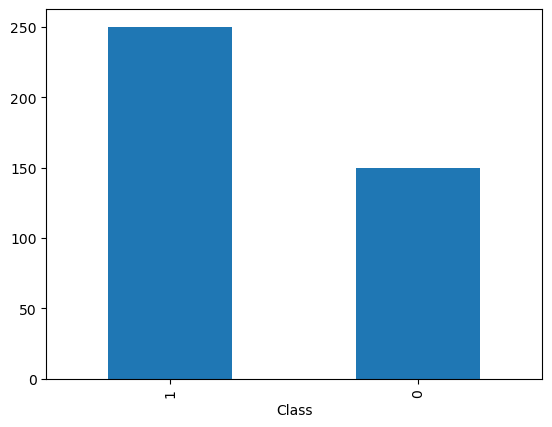

In [107]:
# Visualize class distribution
data['Class'].value_counts().plot(kind = 'bar')

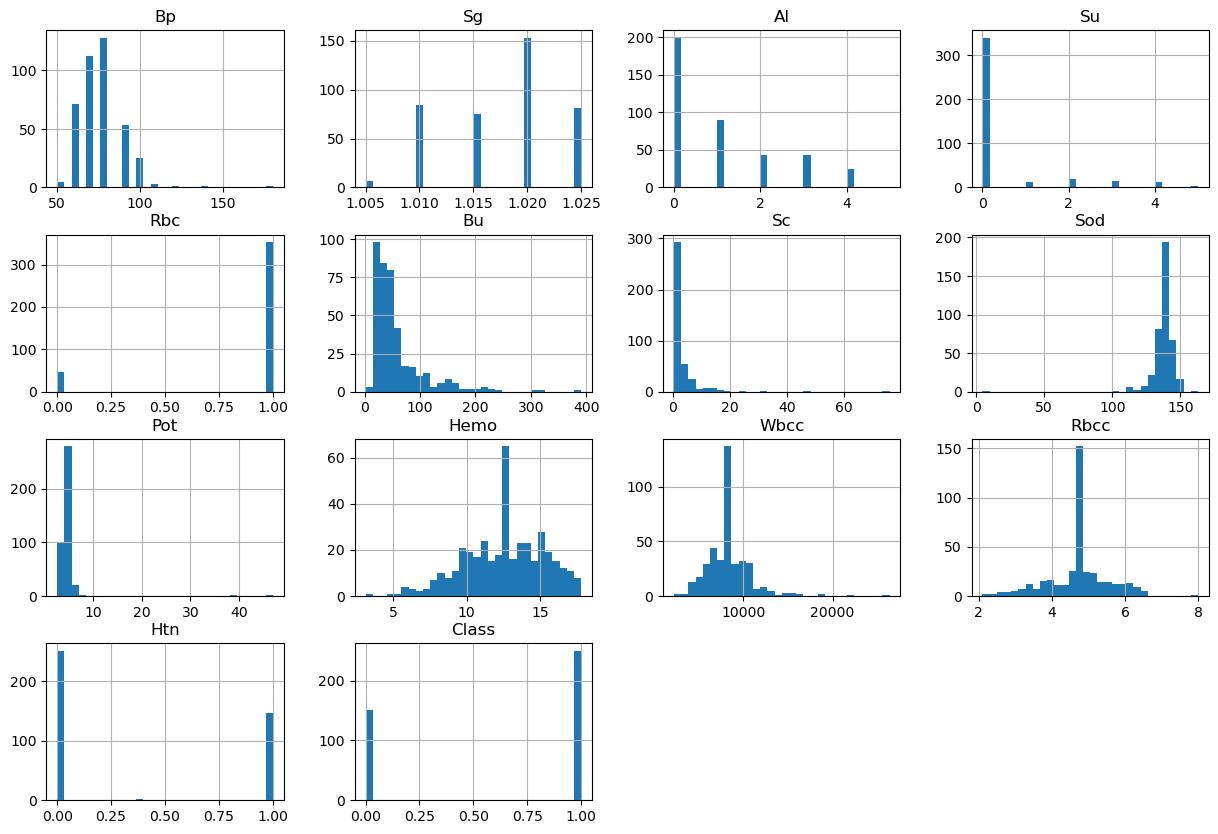

In [108]:
# Histograms and box plots for individual features:
data.hist(bins=30, figsize=(15, 10))

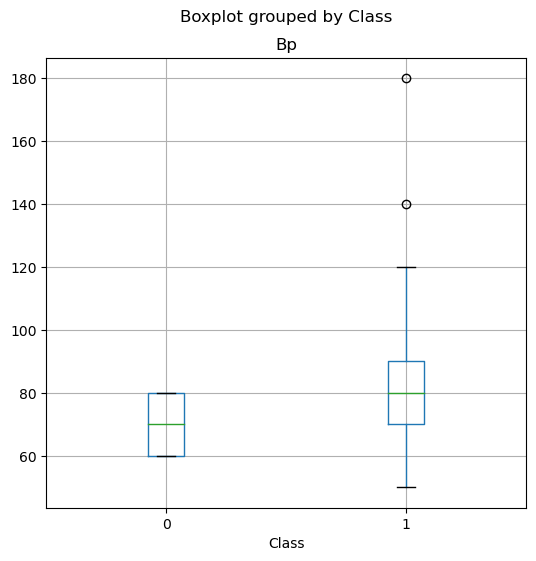

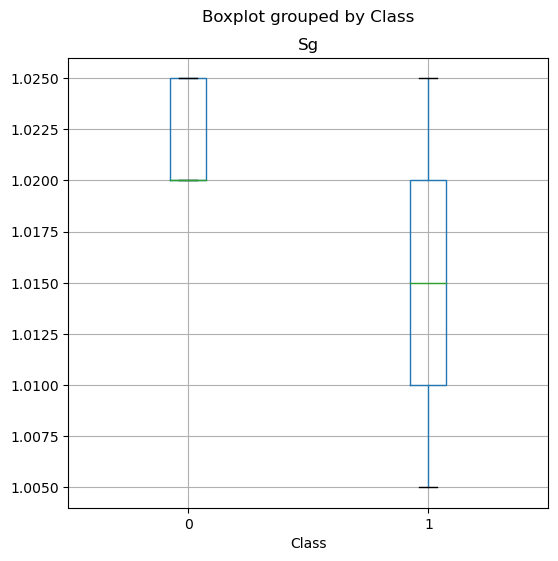

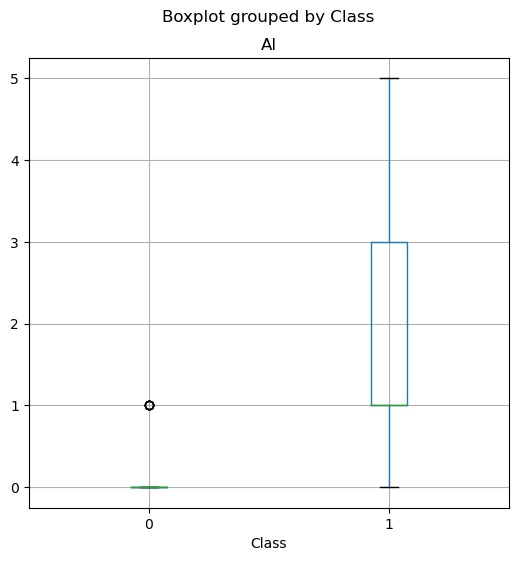

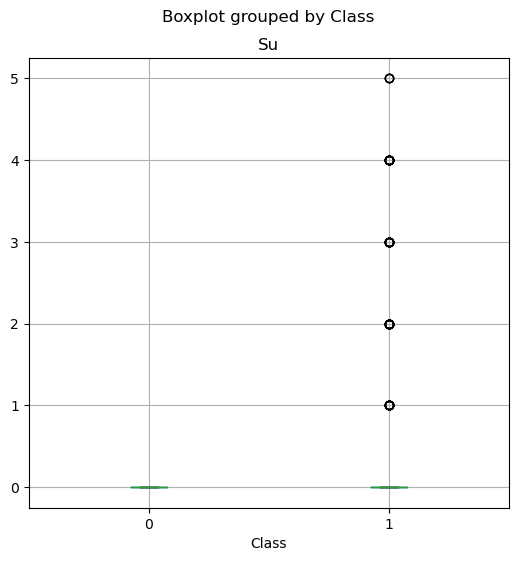

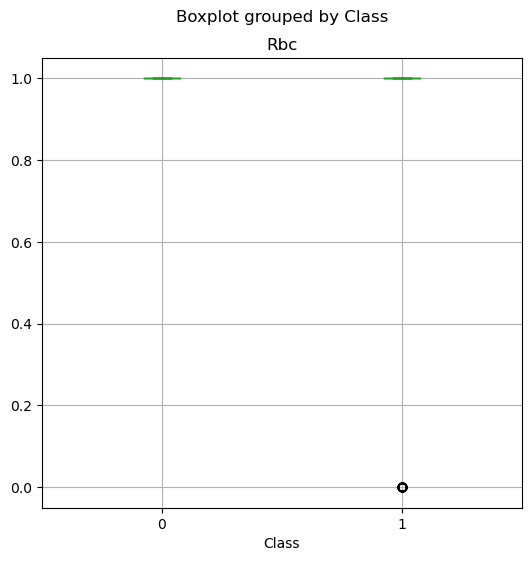

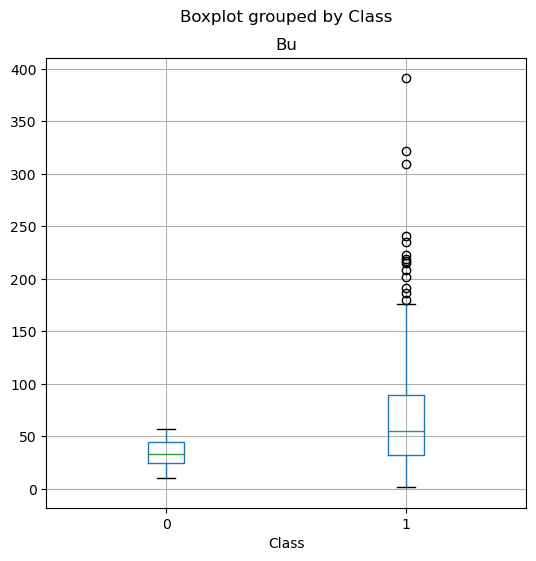

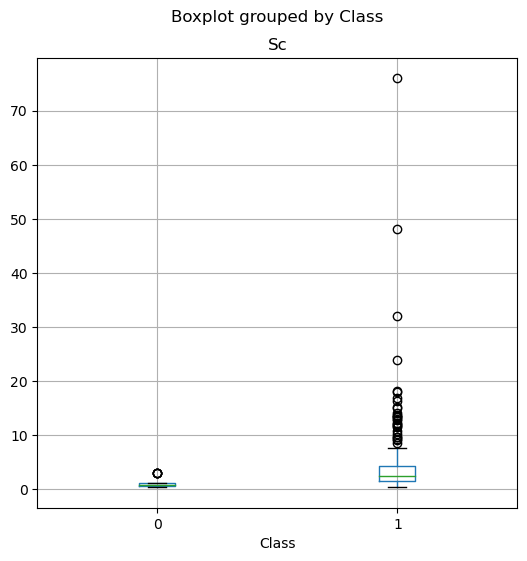

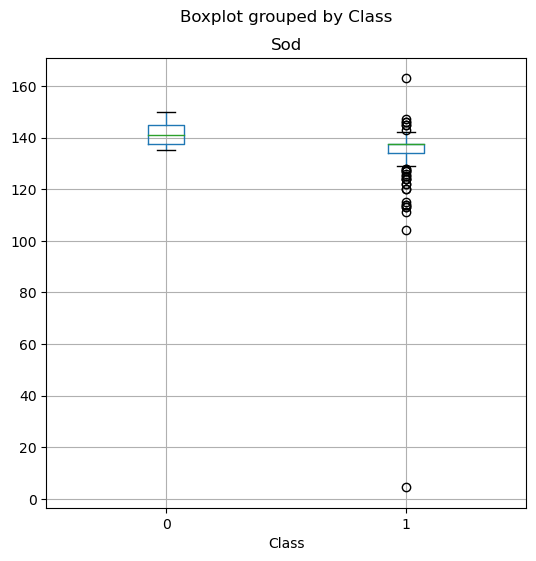

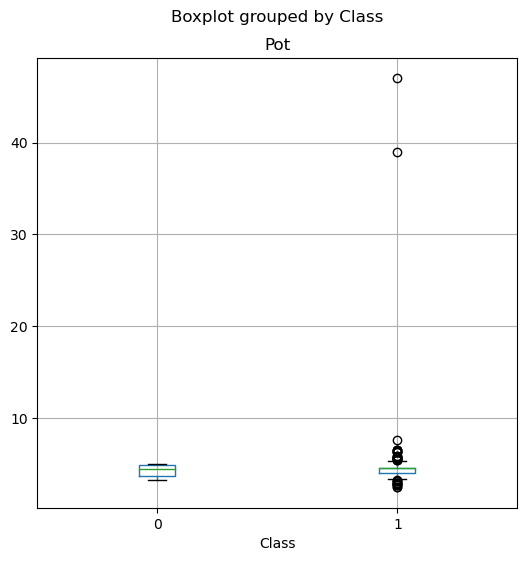

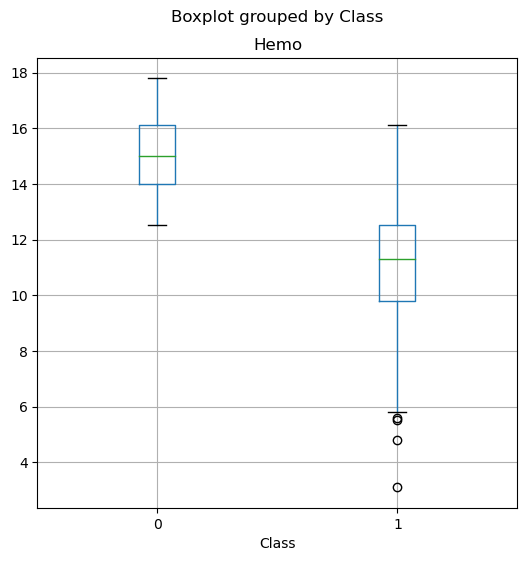

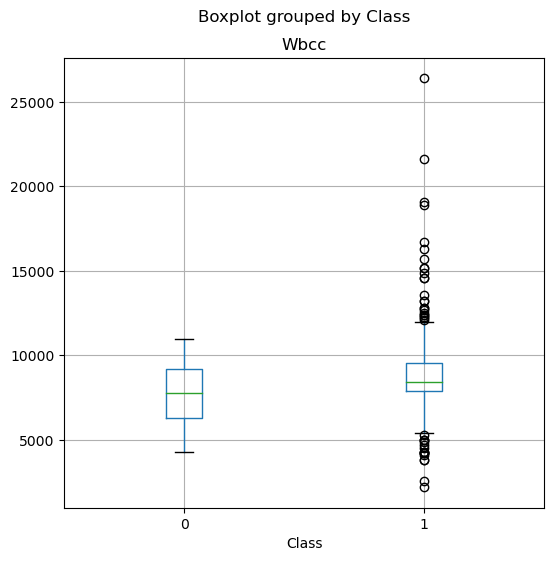

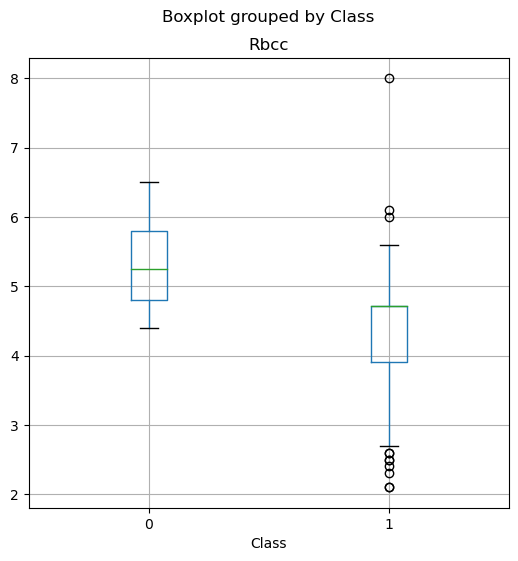

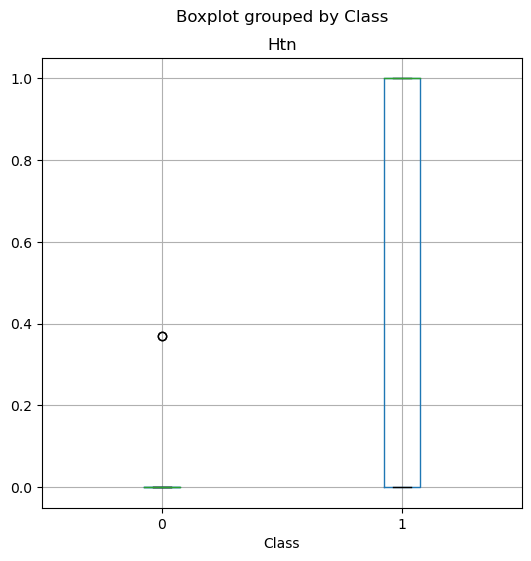

In [110]:
# Box plots by class
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc','Rbcc', 'Htn']
for col in features:
    data.boxplot(column=col, by='Class', figsize=(6,6))
    plt.title(col)
plt.show()

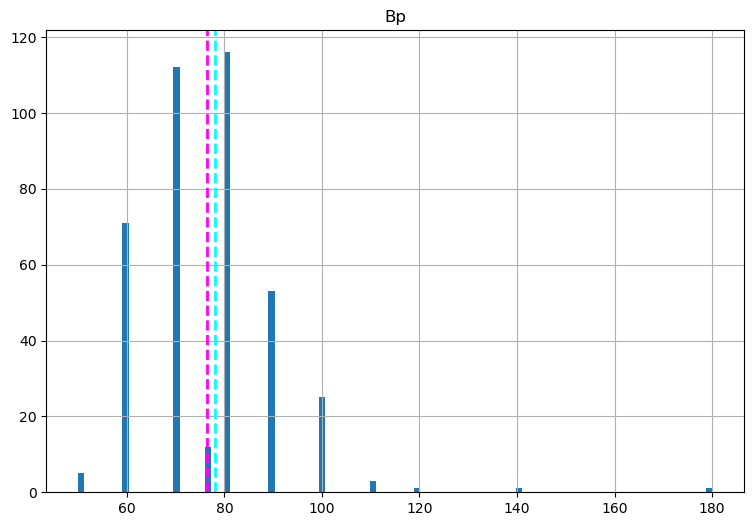

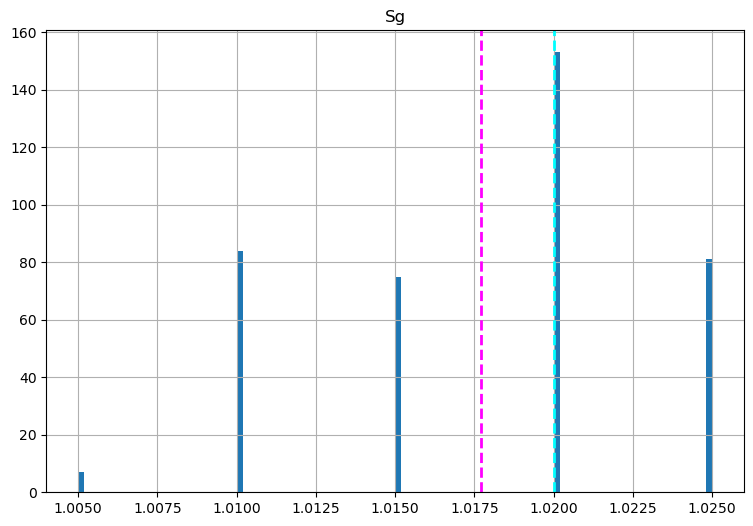

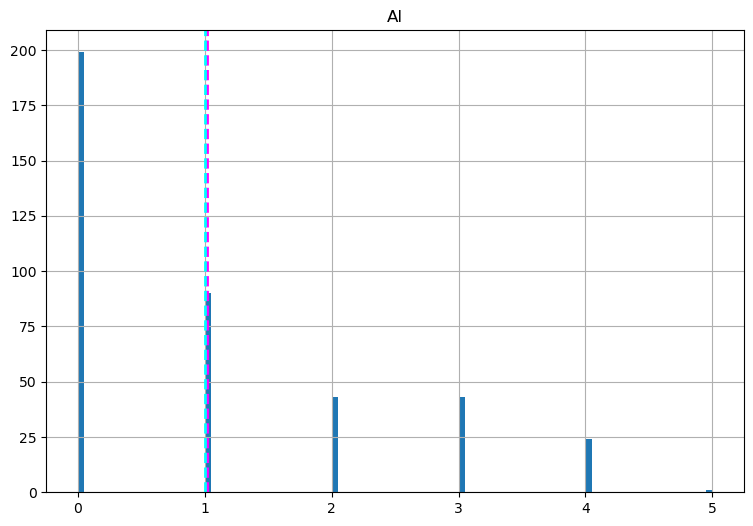

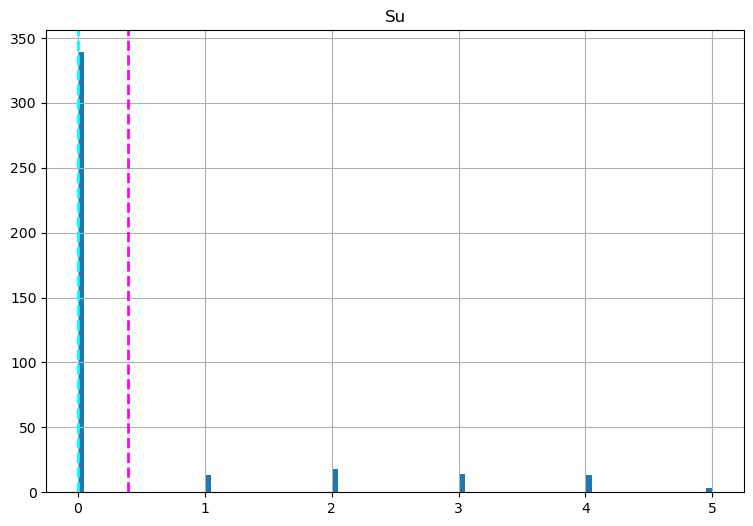

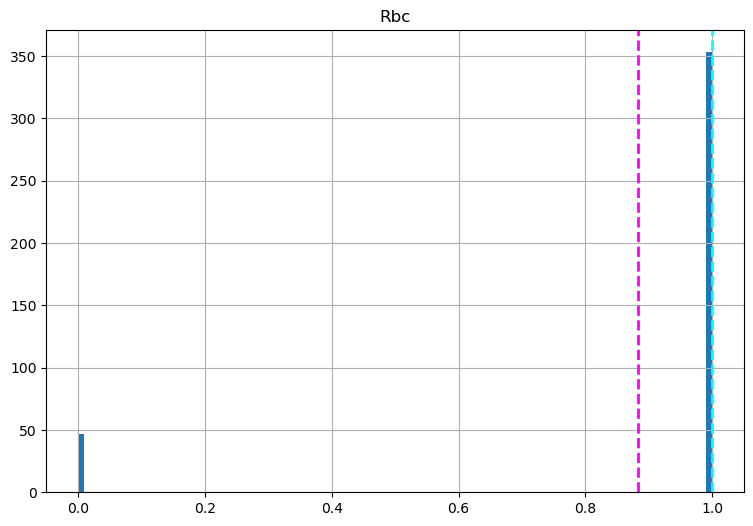

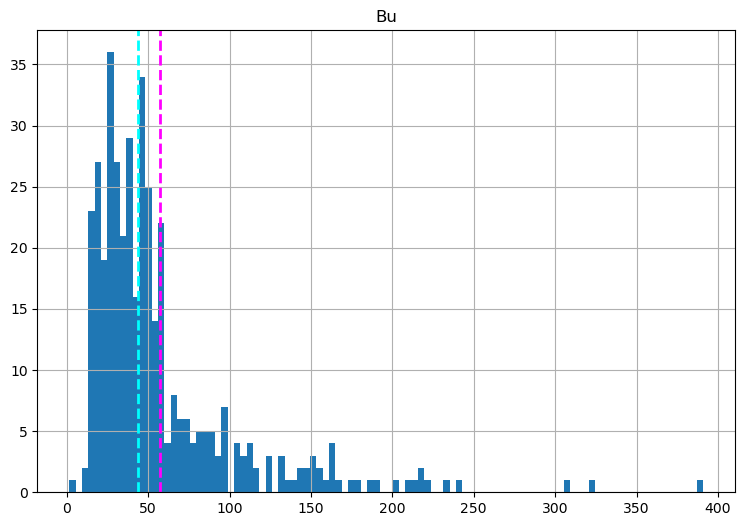

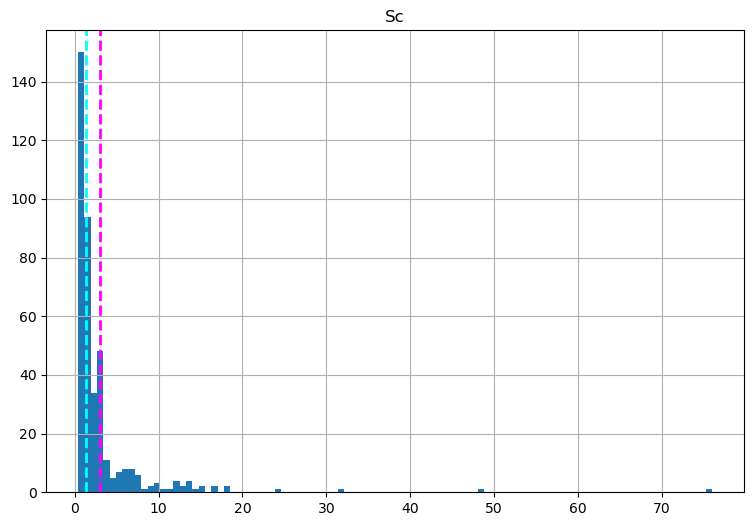

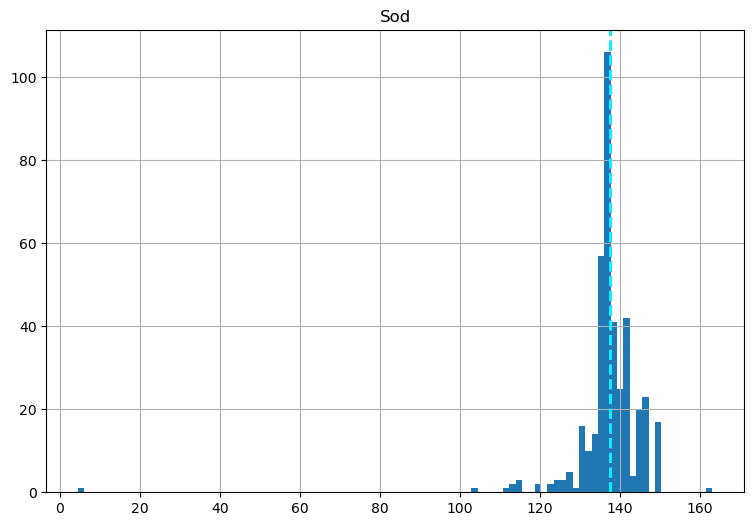

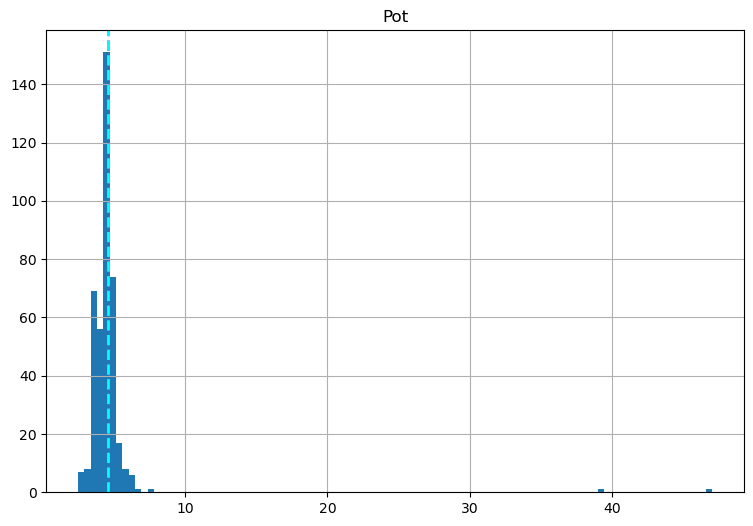

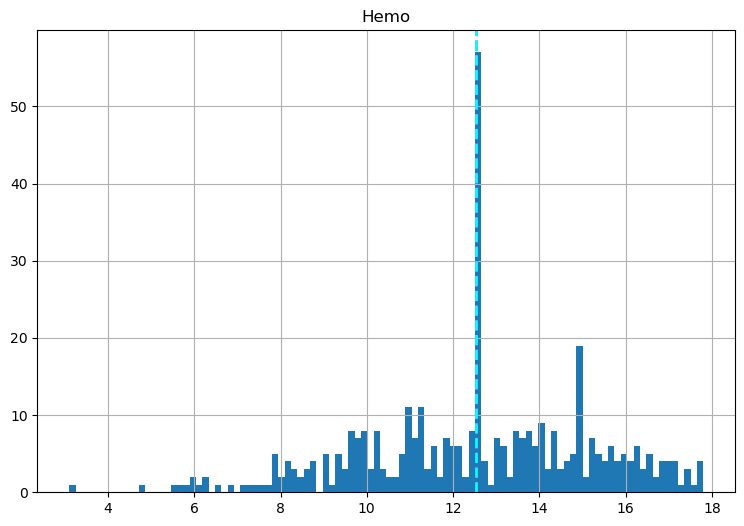

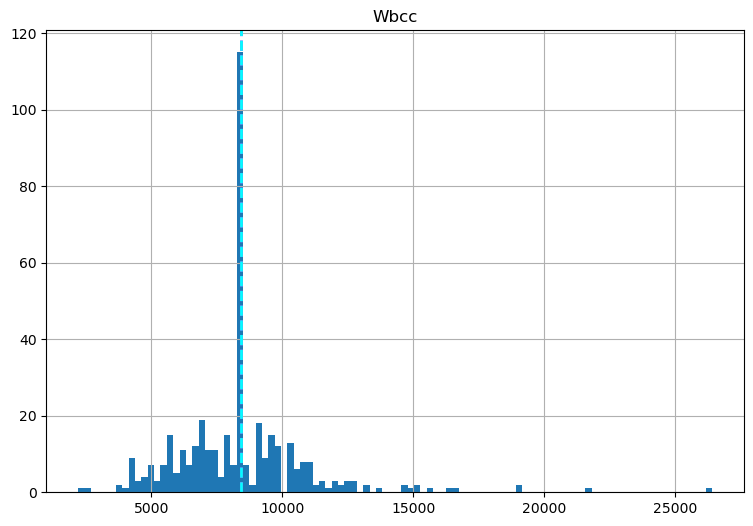

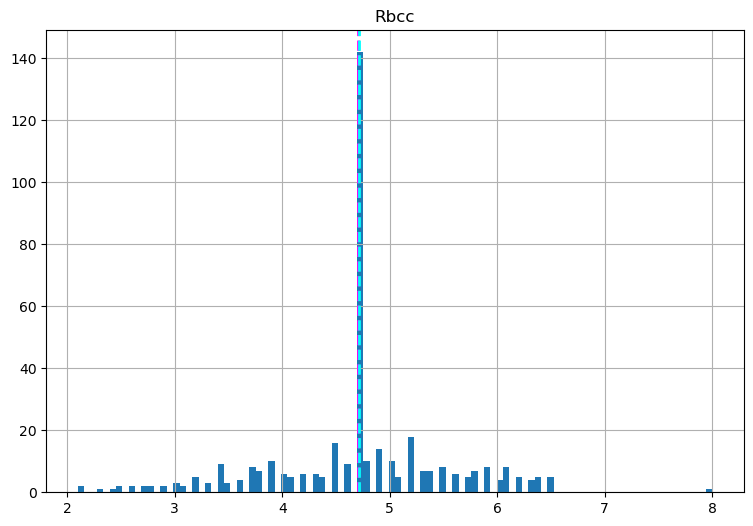

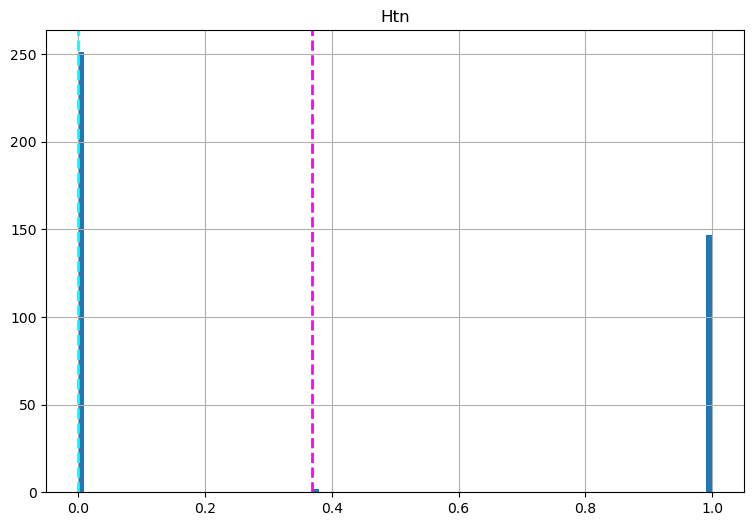

In [111]:
# Plot a histogram for each numeric feature
for col in features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

## Data Preprocessing

In [112]:
# Get the descriptive statistics of the data
data.describe().transpose()

count         mean          std       min       25%      50%       75%  \
Bp     400.0    76.455000    13.476536    50.000    70.000    78.00    80.000   
Sg     400.0     1.017712     0.005434     1.005     1.015     1.02     1.020   
Al     400.0     1.015000     1.272329     0.000     0.000     1.00     2.000   
Su     400.0     0.395000     1.040038     0.000     0.000     0.00     0.000   
Rbc    400.0     0.882500     0.322418     0.000     1.000     1.00     1.000   
Bu     400.0    57.405500    49.285970     1.500    27.000    44.00    61.750   
Sc     400.0     3.072350     5.617490     0.400     0.900     1.40     3.070   
Sod    400.0   137.529025     9.204273     4.500   135.000   137.53   141.000   
Pot    400.0     4.627850     2.819783     2.500     4.000     4.63     4.800   
Hemo   400.0    12.526900     2.716171     3.100    10.875    12.53    14.625   
Wbcc   400.0  8406.090000  2523.219976  2200.000  6975.000  8406.00  9400.000   
Rbcc   400.0     4.708275     0.840315     2.100     4.500     4.71     5.100   
Htn    400.0     0.369350     0.482023     0.000     0.000     0.00     1.000   
Class  400.0     0.625000     0.484729     0.000     0.000     1.00     1.000   

             max  
Bp       180.000  
Sg         1.025  
Al         5.000  
Su         5.000  
Rbc        1.000  
Bu       391.000  
Sc        76.000  
Sod      163.000  
Pot       47.000  
Hemo      17.800  
Wbcc   26400.000  
Rbcc       8.000  
Htn        1.000  
Class      1.000

In [113]:
# Replace the zeros on the Al column with its mean
ai_mean = data.loc[data['Al'] > 0, 'Al'].mean()
data['Al'] = data['Al'].replace(0, ai_mean)

In [114]:
# Replace the zeros on the Su column with its mean
su_mean = data.loc[data['Su'] > 0, 'Su'].mean()
data['Su'] = data['Su'].replace(0, su_mean)

In [115]:
# Replace the zeros on the Rbc column with its mean
rbc_mean = data.loc[data['Rbc'] > 0, 'Rbc'].mean()
data['Rbc'] = data['Rbc'].replace(0, rbc_mean)

In [116]:
# Get the descriptive statistics of the data after the replacement
data.describe().transpose()

count         mean          std       min          25%          50%  \
Bp     400.0    76.455000    13.476536    50.000    70.000000    78.000000   
Sg     400.0     1.017712     0.005434     1.005     1.015000     1.020000   
Al     400.0     2.019900     0.772199     1.000     2.000000     2.019900   
Su     400.0     2.590164     0.460886     1.000     2.590164     2.590164   
Rbc    400.0     1.000000     0.000000     1.000     1.000000     1.000000   
Bu     400.0    57.405500    49.285970     1.500    27.000000    44.000000   
Sc     400.0     3.072350     5.617490     0.400     0.900000     1.400000   
Sod    400.0   137.529025     9.204273     4.500   135.000000   137.530000   
Pot    400.0     4.627850     2.819783     2.500     4.000000     4.630000   
Hemo   400.0    12.526900     2.716171     3.100    10.875000    12.530000   
Wbcc   400.0  8406.090000  2523.219976  2200.000  6975.000000  8406.000000   
Rbcc   400.0     4.708275     0.840315     2.100     4.500000     4.710000   
Htn    400.0     0.369350     0.482023     0.000     0.000000     0.000000   
Class  400.0     0.625000     0.484729     0.000     0.000000     1.000000   

               75%        max  
Bp       80.000000    180.000  
Sg        1.020000      1.025  
Al        2.019900      5.000  
Su        2.590164      5.000  
Rbc       1.000000      1.000  
Bu       61.750000    391.000  
Sc        3.070000     76.000  
Sod     141.000000    163.000  
Pot       4.800000     47.000  
Hemo     14.625000     17.800  
Wbcc   9400.000000  26400.000  
Rbcc      5.100000      8.000  
Htn       1.000000      1.000  
Class     1.000000      1.000

## Train | Test | Split

In [118]:
# Split the data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

In [119]:
scaler = StandardScaler()

In [122]:
columns_to_scale = ['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo','Wbcc', 'Rbcc', 'Htn']

In [123]:
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
X

Bp        Sg        Al        Su  Rbc        Bu        Sc  \
0    0.263379  0.421486 -1.322428  0.000000  0.0 -0.434856 -0.333725   
1   -1.965500  0.421486  2.567445  0.000000  0.0 -0.800529 -0.405020   
2    0.263379 -1.421074 -0.025803  0.890348  0.0 -0.089498 -0.226782   
3   -0.479581 -2.342354  2.567445  0.000000  0.0 -0.028553  0.129695   
4    0.263379 -1.421074 -0.025803  0.000000  0.0 -0.638008 -0.298077   
..        ...       ...       ...       ...  ...       ...       ...   
395  0.263379  0.421486  0.000000  0.000000  0.0 -0.170759 -0.458491   
396 -0.479581  1.342766  0.000000  0.000000  0.0 -0.536432 -0.333725   
397  0.263379  0.421486  0.000000  0.000000  0.0 -0.638008 -0.440668   
398 -1.222540  1.342766  0.000000  0.000000  0.0 -0.150444 -0.369372   
399  0.263379  1.342766  0.000000  0.000000  0.0 -0.800529 -0.351548   

          Sod       Pot      Hemo      Wbcc      Rbcc       Htn  
0    0.000106  0.000763  1.059100 -0.240506  0.585900  1.309979  
1    0.000106  0.000763 -0.452268 -0.954773  0.002055 -0.767210  
2    0.000106  0.000763 -1.078932 -0.359550  0.002055 -0.767210  
3   -2.885860 -0.755560 -0.489130 -0.677003 -0.963076  1.309979  
4    0.000106  0.000763 -0.341680 -0.438913 -0.129012 -0.767210  
..        ...       ...       ...       ...       ...       ...  
395  1.356608  0.096635  1.169688 -0.677003  0.228444 -0.767210  
396  0.377577 -0.400479  1.464589 -0.240506  1.777420 -0.767210  
397 -0.057548 -0.080905  1.206551 -0.716684  0.824204 -0.767210  
398 -0.275110  0.096635  0.616749 -0.478595  1.419964 -0.767210  
399  0.377577 -0.400479  1.206551 -0.637321  1.658268 -0.767210  

[400 rows x 13 columns]

In [124]:
y.value_counts()

Class
1    250
0    150
Name: count, dtype: int64

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
print('Training Cases: %d\nTest Case: %d' %(X_train.shape[0], X_test.shape[0]))

Training Cases: 320
Test Case: 80


In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
# Define models and their hyperparameters for grid search
models = [
    ('Logistic Regression', LogisticRegression(), {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    }),
    ('Decision Tree', DecisionTreeClassifier(), {
        'max_depth': [3, 5, 7],
        'criterion': ['gini', 'entropy']
    }),
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 150],
        'max_features': ['auto', 'sqrt', 'log2']
    }),
    ('SVM', SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    }),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }),
    ('Naive Bayes', GaussianNB(), {}),
    ('Gradient Boosting', GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    ('AdaBoost', AdaBoostClassifier(), {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    ('XGBoost', XGBClassifier(), {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    })
]

In [131]:
# Define an empty lists to hold the result and the model name
results = []
names = []

In [132]:
# Function for Grid Search for Hyperparameter Tuning
for name, model, params in models:
    grid = GridSearchCV(estimator=model, param_grid=params, cv=3, n_jobs=-1, scoring='accuracy')
    grid_result = grid.fit(X_train, y_train)
    
    # Storing Results
    results.append(grid_result.cv_results_)
    names.append(name)
    
    # Print best parameters and results
    print(f"Best parameters for {name}: {grid_result.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {grid_result.best_score_:.4f}")
    
    # Evaluate on test set
    best_model = grid_result.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {name}: {test_accuracy:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Best cross-validation accuracy for Logistic Regression: 0.9718
Test Accuracy for Logistic Regression: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Confusion Matrix:
 [[28  0]
 [ 0 52]]
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3}
Best cross-validation accuracy for Decision Tree: 0.9624
Test Accuracy for Decision Tree: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg    

C:\anacondamain\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anacondamain\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anacondamain\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\anacondamain\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\anacondamain\lib\site-packages\sklearn\utils\_param_validation.py", line 95, i

Best parameters for Random Forest: {'max_features': 'sqrt', 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.9875
Test Accuracy for Random Forest: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Confusion Matrix:
 [[28  0]
 [ 0 52]]
Best parameters for SVM: {'C': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy for SVM: 0.9750
Test Accuracy for SVM: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weig

C:\anacondamain\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 50}
Best cross-validation accuracy for AdaBoost: 0.9749
Test Accuracy for AdaBoost: 0.9875

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80


Confusion Matrix:
 [[28  0]
 [ 1 51]]
Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150}
Best cross-validation accuracy for XGBoost: 0.9718
Test Accuracy for XGBoost: 0.9875

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.

In [133]:
# Create and Train the AdaBoost Model
model = AdaBoostClassifier(learning_rate=0.1, n_estimators=50, random_state=42)
model.fit(X_train_scaled, y_train)

C:\anacondamain\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.1, random_state=42)

In [134]:
# Evaluate the Model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 98.75%



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80


Confusion Matrix:


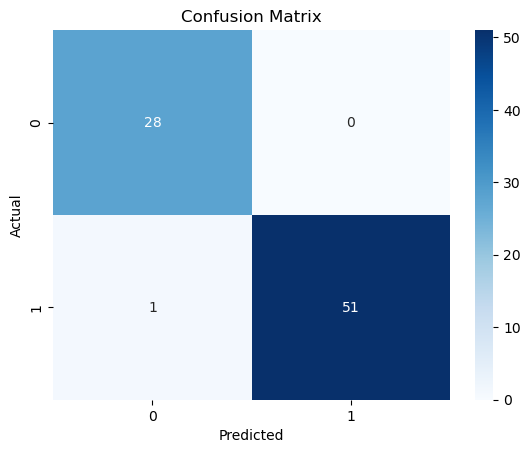

In [135]:
# Print and visualize the confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Feature Importances:
   Feature  Importance
9     Hemo        0.38
6       Sc        0.24
2       Al        0.18
1       Sg        0.06
7      Sod        0.06
11    Rbcc        0.04
10    Wbcc        0.02
12     Htn        0.02
0       Bp        0.00
3       Su        0.00
4      Rbc        0.00
5       Bu        0.00
8      Pot        0.00


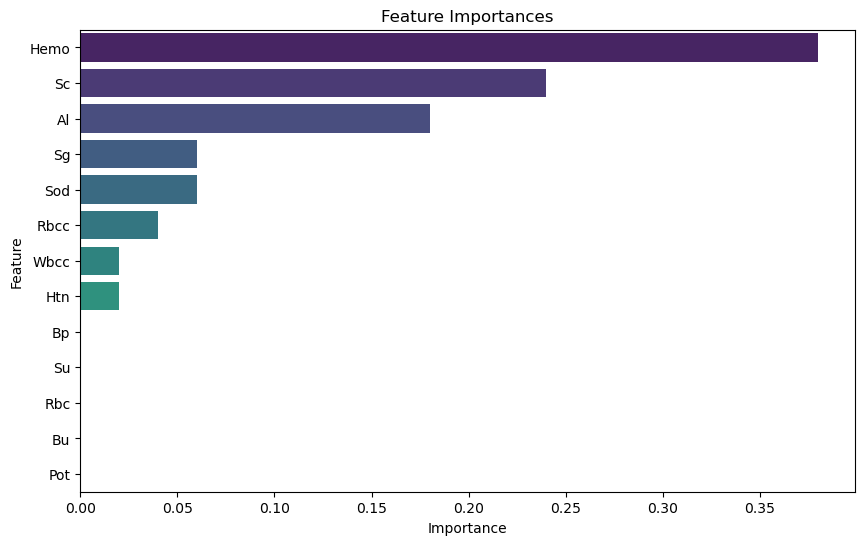

In [137]:
# Get Feature Importances
importances = model.feature_importances_

# Create DataFrame for Feature Importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print Feature Importances
print("\nFeature Importances:")
print(feature_importances_df)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Feature Importances')
plt.show()